# Quadcopters 

- typically 4 rotors
- rotors are directed upwards
- square formation
- center of mass at the center of the square
- control by adjusting the speed of each rotor

- Dynamic models 

- controller
    - PID controller
    - LQR controller
    - nonlinear $H_\infty$ controller
    - nonlienar nested saturations

- sensors
    - IMU
    - GPS
    - camera
    - LIDAR

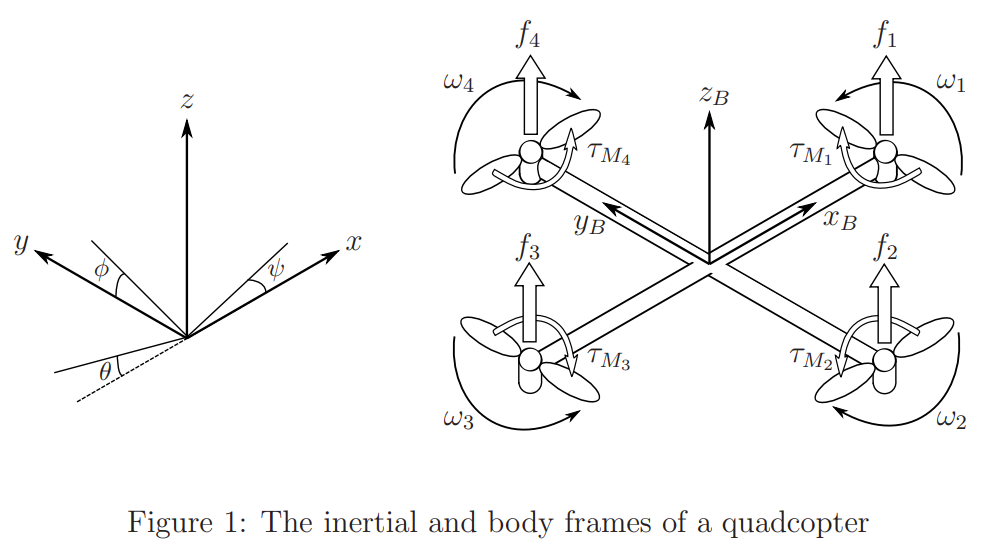

In [3]:
from sympy import symbols, Eq, solve, sin, cos, Function, Matrix

# Global Inertial Frame
t = symbols("t")  # time variable
x, y, z = Function("x")(t), Function("y")(t), Function("z")(t)  # position functions
phi = Function("phi")(t)  # roll
theta = Function("theta")(t)  # pitch
psi = Function("psi")(t)  # yaw

zeta = Matrix([x, y, z])  # position vector
eta = Matrix([phi, theta, psi])  # orientation vector

q = Matrix.vstack(zeta, eta)  # generalized coordinate vector

In [ ]:
# Body Frame
V_B = Matrix(symbols("V_Bx V_By V_Bz"))  # velocity vector in body frame
nv = Matrix(symbols("p q r"))  # angular velocity component in body frame

In [6]:
# Rotation from body framt to global frame
R = Matrix([ cos(psi)*cos(theta), cos(psi)*sin(theta)*sin(phi)-sin(psi)*cos(phi), cos(psi)*sin(theta)*cos(phi)+sin(psi)*sin(phi),
             sin(psi)*cos(theta), sin(psi)*sin(theta)*sin(phi)+cos(psi)*cos(phi), sin(psi)*sin(theta)*cos(phi)-cos(psi)*sin(phi),
             -sin(theta),        cos(theta)*sin(phi),                             cos(theta)*cos(phi)                            ]).reshape(3,3)
R

Matrix([
[cos(psi(t))*cos(theta(t)), sin(phi(t))*sin(theta(t))*cos(psi(t)) - sin(psi(t))*cos(phi(t)),  sin(phi(t))*sin(psi(t)) + sin(theta(t))*cos(phi(t))*cos(psi(t))],
[sin(psi(t))*cos(theta(t)), sin(phi(t))*sin(psi(t))*sin(theta(t)) + cos(phi(t))*cos(psi(t)), -sin(phi(t))*cos(psi(t)) + sin(psi(t))*sin(theta(t))*cos(phi(t))],
[           -sin(theta(t)),                                       sin(phi(t))*cos(theta(t)),                                        cos(phi(t))*cos(theta(t))]])

In [ ]:
from sympy import Equality, trigsimp
# verify R is orthogonal
trigsimp(R.T - R.inv()) == Matrix.zeros(3,3)

True

In [ ]:
# transformation matrix for angular velocity